In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [66]:
# Reading two csv files and combining them together
def read_data():

    df1=pd.read_csv('outputfile_1.csv')
    df2=pd.read_csv('outputfile_2.csv')
    df3=pd.read_csv('outputfile_3.csv')
    df4=pd.read_csv('outputfile_4.csv')

# df_parking=pd.read_csv('parking.csv')

    df=pd.concat([df1,df2,df3,df4])
    df_park=pd.concat([df2,df3,df4])

    return df,df_park
df,df_park=read_data()

Mapping Access distance and egress distance into 5 bins each

In [69]:
# def map_access_dis(ACCESS_DIS):
#     if ACCESS_DIS in [1, 2]:
#         return ACCESS_DIS
#     elif ACCESS_DIS in [3,4]:
#         return 3
#     elif ACCESS_DIS in [5,6,7,8]:
#         return 4
#     elif ACCESS_DIS in [9,10,11]:
#         return 5

# # Apply the mapping function to create the 'ACCESS_DIS_B' column
# df['ACCESS_DIS_B'] = df['ACCESS_DIS'].apply(map_access_dis)



# # convert all values of EGRESS_DIS into integers
# df["EGRESS_DIS"]=df["EGRESS_DIS"].astype(int)

# def map_egress_dis(EGRESS_DIS):
#     if EGRESS_DIS in [1,2]:
#         return int(EGRESS_DIS)
#     if EGRESS_DIS in [3,4]:
#         return 3
#     if EGRESS_DIS in [5,6,7,8]:
#         return 4
#     if EGRESS_DIS in [9,10,11]:
#         return 5
#     elif EGRESS_DIS in [0]:
#         return 2
    
    

# # Apply the mapping function to create the 'EGRESS_DIS_B' column
# df['EGRESS_DIS_B'] = df['EGRESS_DIS'].apply(map_egress_dis)


Mapping Access and egress distances into 3 bins each

In [248]:
def map_distances():
    df["ACCESS_DIS"]=df["ACCESS_DIS"].astype(int)
    df['ACCESS_DIS_BIN']=0


    def map_access_dis(ACCESS_DIS):
        if ACCESS_DIS in [1, 2]:
            return 1
        elif ACCESS_DIS in [3,4,5,6]:
            return 2
        elif ACCESS_DIS in [7,8,9,10,11]:
            return 3

    # Apply the mapping function to create the 'ACCESS_DIS_BIN' column
    df['ACCESS_DIS_BIN'] = df['ACCESS_DIS'].apply(map_access_dis)
    print(df['ACCESS_DIS_BIN'].value_counts())

    df['EGRESS_DIS_BIN']=0
    df["EGRESS_DIS"]=df["EGRESS_DIS"].astype(int)

    def map_egress_dis(EGRESS_DIS):
        if EGRESS_DIS in [1,2]:
            return 1
        if EGRESS_DIS in [3,4,5,6]:
            return 2
        if EGRESS_DIS in [7,8,9,10,11]:
            return 3
        elif EGRESS_DIS in [0]:
            return 1
    

    # Apply the mapping function to create the 'EGRESS_DIS_BIN' column
    df['EGRESS_DIS_BIN'] = df['EGRESS_DIS'].apply(map_egress_dis)
    print(df['EGRESS_DIS_BIN'].value_counts())
    

    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df['ACCESS_TIME_B'] = pd.cut(df['ACCESS_TIME'], bins=bins, labels=labels)


    # Define the bin ranges
    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df['EGRESS_TIME_B'] = pd.cut(df['EGRESS_TIME'], bins=bins, labels=labels)




    df_park["ACCESS_DIS"]=df_park["ACCESS_DIS"].astype(int)
    df_park['ACCESS_DIS_BIN']=0


    def map_access_dis(ACCESS_DIS):
        if ACCESS_DIS in [1, 2]:
            return 1
        elif ACCESS_DIS in [3,4,5,6]:
            return 2
        elif ACCESS_DIS in [7,8,9,10,11]:
            return 3

    # Apply the mapping function to create the 'ACCESS_DIS_BIN' column
    df_park['ACCESS_DIS_BIN'] = df_park['ACCESS_DIS'].apply(map_access_dis)
    print(df_park['ACCESS_DIS_BIN'].value_counts())

    df_park['EGRESS_DIS_BIN']=0
    df_park["EGRESS_DIS"]=df_park["EGRESS_DIS"].astype(int)

    def map_egress_dis(EGRESS_DIS):
        if EGRESS_DIS in [1,2]:
            return 1
        if EGRESS_DIS in [3,4,5,6]:
            return 2
        if EGRESS_DIS in [7,8,9,10,11]:
            return 3
        elif EGRESS_DIS in [0]:
            return 1
    

    # Apply the mapping function to create the 'EGRESS_DIS_BIN' column
    df_park['EGRESS_DIS_BIN'] = df_park['EGRESS_DIS'].apply(map_egress_dis)
    print(df_park['EGRESS_DIS_BIN'].value_counts())
    

    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df_park['ACCESS_TIME_B'] = pd.cut(df_park['ACCESS_TIME'], bins=bins, labels=labels)


    # Define the bin ranges
    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df_park['EGRESS_TIME_B'] = pd.cut(df_park['EGRESS_TIME'], bins=bins, labels=labels)

    
    return df,df_park
df,df_park=map_distances()

1    1562
2     589
3     342
Name: ACCESS_DIS_BIN, dtype: int64
1    1686
2     535
3     272
Name: EGRESS_DIS_BIN, dtype: int64
1    915
2    279
3    184
Name: ACCESS_DIS_BIN, dtype: int64
1    944
2    287
3    147
Name: EGRESS_DIS_BIN, dtype: int64


Mapping Income levels into 6 groups. Income levels are available only for 1168 samples

In [204]:
# df,df_park=read_data()
income_mapper={'>2 Lakhs':6, 'nan':0, '25,001 – 50,000':3, '1,00,001 – 2,00,000':5,
       '10,001 – 25,000':2, '50,001 – 1,00,000':4, '<=10,000':1}
df['INCOME']=df.INCOME.map(income_mapper)

Cross-tabulation of Access distacce and egress distance

ACCESS_DIS_BIN      1      2      3
EGRESS_DIS_BIN                     
1               66.79  21.12  12.10
2               52.52  31.59  15.89
3               56.99  23.53  19.49
All             62.66  23.63  13.72


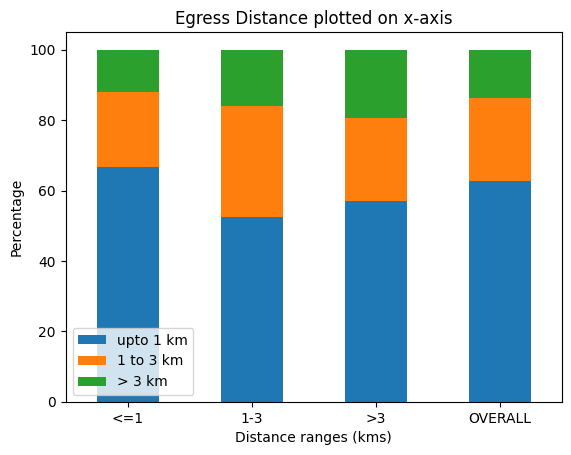

In [77]:
# df=df.loc[(df['RENT_BICYCLE']==1) | (df['RENT_BICYCLE']==2)]
crosstab=pd.crosstab(df['EGRESS_DIS_BIN'],df['ACCESS_DIS_BIN'],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
print(crosstab)

# Plotting crosstabulation
bar_width=0.5
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Distance ranges (kms)')
plt.ylabel('Percentage')
plt.title("Egress Distance plotted on x-axis")
plt.xticks([0,1,2,3],['<=1','1-3','>3','OVERALL'])
plt.legend(['upto 1 km','1 to 3 km','> 3 km'])
plt.xticks(rotation=0)
plt.show()

Among people using it for either Access or Egress, if access distance is within 0.5 km then 75% of them are willing to use it for egress only 

In [206]:
df1=df.loc[(df['ACCESS_DIS_B']==1)]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
print(df1['TOTAL_TIME'].describe())
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(196, 53)
count    196.000000
mean      60.091837
std       47.596614
min       10.000000
25%       30.000000
50%       45.000000
75%       75.000000
max      420.000000
Name: TOTAL_TIME, dtype: float64


If access distance is between 0.5 to 1 km, then 68.6% are willing to use bicycle for access trip only


In [94]:
df1=df.loc[(df['ACCESS_DIS_B']==2)]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(137, 53)


If access distance is between 1 to 3 kms, then more people are opting for use of bicycle for access trip only

In [91]:
df1=df.loc[(df['ACCESS_DIS_BIN']==2)]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(143, 53)


If access distance is more than 3 km, 56.2% are willing to use it for access trip only. N=89

In [100]:
df1=df.loc[(df['ACCESS_DIS_BIN']==3) ]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(89, 53)


Among commuters using it for either Access or Egress, if Egress distance is within 1 km then 81.4 % of them are willing to use it for access only 


In [112]:
df2=df.loc[(df['EGRESS_DIS_B'] ==1)]
df2=df2.loc[(df2['RENT_BICYCLE']==1) | (df2['RENT_BICYCLE']==2)]
print(df2.shape)
px.histogram(data_frame=df2,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(242, 53)


For egress distance between 0.5 to 1 km, the share of commuters opting for egress only is 56%. (N=127)

In [114]:
df2=df.loc[(df['EGRESS_DIS_B'] ==2)]
df2=df2.loc[(df2['RENT_BICYCLE']==1) | (df2['RENT_BICYCLE']==2)]
print(df2.shape)
px.histogram(data_frame=df2,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(127, 53)


If the egress distance is between 1 to 3 km, then 80.5% are willing to use the bicycle for egress only. 

In [113]:
df2=df.loc[(df['EGRESS_DIS_BIN'] ==2)]
df2=df2.loc[(df2['RENT_BICYCLE']==1) | (df2['RENT_BICYCLE']==2)]
print(df2.shape)
px.histogram(data_frame=df2,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(123, 53)


If access distance or egress distance, either of them are less than 1 km, then proprtion of that samples with ages less than 35 (88%) is more compared to overall sample(80%). May be thats one of the reasons for more commuters chosing to use bicycle for both access and egress despite 

In [165]:
df2=df.loc[(df['RENT_BICYCLE']==3) ]
df2=df2.loc[(df2['ACCESS_DIS_BIN']==1) | (df2['EGRESS_DIS_BIN']==1)]
print(df2['AGE_C'].value_counts())
print(df['AGE_C'].value_counts())

1    283
0    196
Name: MALE, dtype: int64
1    1327
2     696
3     299
4     142
5      29
Name: AGE_C, dtype: int64


•	Among the commuters who use bicycle for either Access or Egress trip, 66% are willing to use it for egress only if access time is less than 5 minutes. (N=219)

In [226]:
df,df_park=read_data()
df,df_park=map_distances()
df1=df.loc[(df['ACCESS_TIME_B']=='1-5')]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

1    1562
2     589
3     342
Name: ACCESS_DIS_BIN, dtype: int64
1    1686
2     535
3     272
Name: EGRESS_DIS_BIN, dtype: int64
(60, 55)


•	For access time between 6-20 minutes, the share of commuters opting for access only is 73%. (N=306)

In [151]:
df1=df.loc[(df['ACCESS_TIME_B']=='6-10') | (df['ACCESS_TIME_B']=='11-20')]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(306, 55)


•	If the access time is above 20 minutes, then 62% are willing to use the bicycle for egress only. (N=37)

In [153]:
df1=df.loc[(df['ACCESS_TIME_B']=='21-60')]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(37, 55)


Among the commuters who use bicycle for either Access or Egress trips, if egress time is less than 5 minutes, 76% are willing to use for access only (N=258)

In [154]:
df1=df.loc[(df['EGRESS_TIME_B']=='1-5')]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(258, 55)


For egress time between 6 to 20 minutes, the share of commuters opting for egress only is 66%. (N=267)

(267, 55)


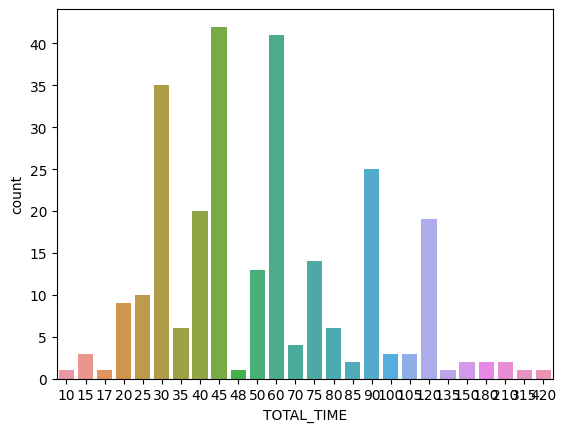

In [227]:
df1=df.loc[(df['EGRESS_TIME_B']=='6-10') | (df['EGRESS_TIME_B']=='11-20')]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
sns.countplot(data=df1,x='TOTAL_TIME')
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

If the egress time is above 20 minutes, then 59% are willing to use the bicycle for access only. (N=34)

In [156]:
df1=df.loc[(df['EGRESS_TIME_B']=='21-60') ]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(34, 55)


Cross tabulation between access time and egress time

ACCESS_TIME_B    1-5   6-10  11-20  21-60
EGRESS_TIME_B                            
1-5            46.25  31.42  17.05   5.28
6-10           39.01  37.68  17.75   5.56
11-20          34.62  34.40  26.20   4.78
21-60          37.90  24.19  29.84   8.06
All            41.34  33.68  19.55   5.43


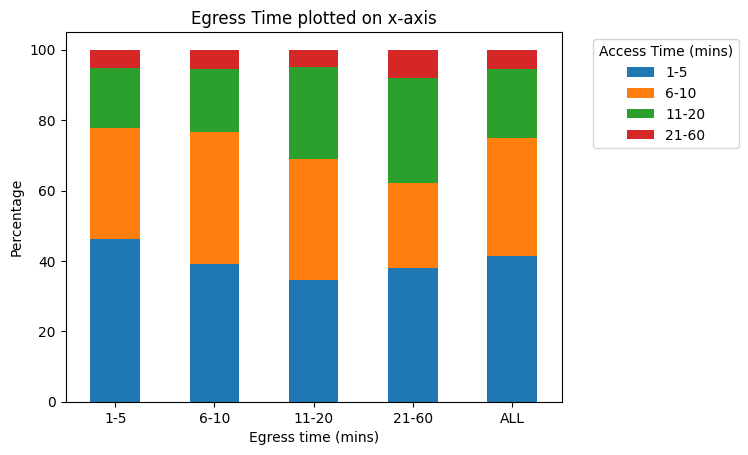

In [142]:
crosstab=pd.crosstab(df["EGRESS_TIME_B"],df["ACCESS_TIME_B"],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
print(crosstab)

# Plotting crosstabulation
bar_width=0.5
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Egress time (mins)')
plt.ylabel('Percentage')
plt.title("Egress Time plotted on x-axis")
plt.xticks([0,1,2,3,4],['1-5','6-10','11-20','21-60','ALL'])
plt.legend(['1-5','6-10','11-20','21-60'])
plt.legend(title='Access Time (mins)',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

Hypothesis: People with own bicycle ownership are more willing to use bicycle than people without

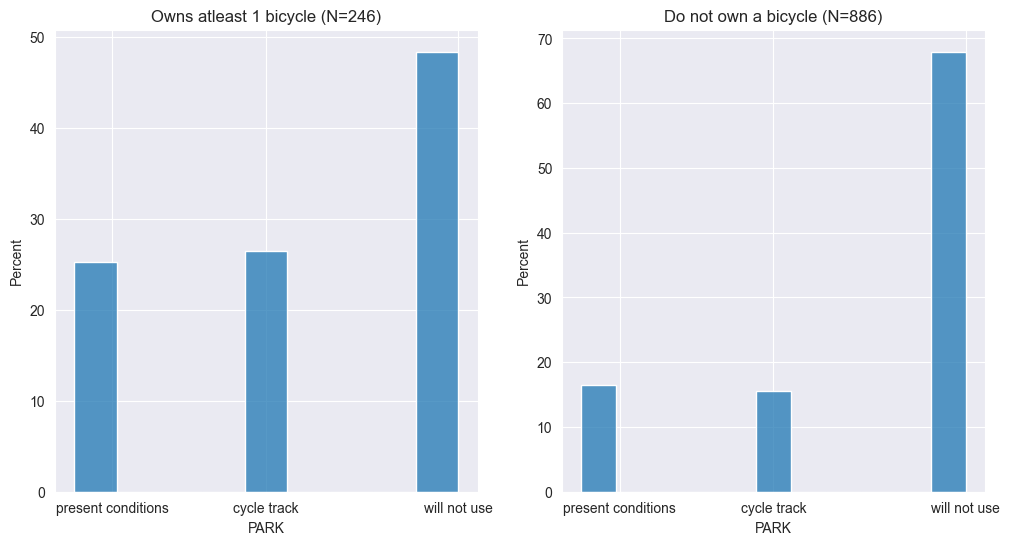

(246, 55) (886, 55)


In [285]:
df1=df_park.loc[((df_park['ORIGIN']==1) | (df_park['DESTINATION']==1))& (df_park['N_BICYCLES']>0)]
df1.loc[df1['PARK']==4,'PARK']=3
df2=df_park.loc[((df_park['ORIGIN']==1)| (df_park['DESTINATION']==1)) & (df_park['N_BICYCLES']==0)]
df2=df2.loc[df2['PARK']!=3]
df2.loc[df2['PARK']==4,'PARK']=3

# plotting two countplots of column PARK from both dataframes df1 and df2, side by side
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.set_style('darkgrid')

custom_ticks_1 = [1.2, 2, 3]  # Customize these based on your data
custom_labels_1 = ['present conditions', 'cycle track', 'will not use']  # Customize these labels
ax[0].set_xticks(custom_ticks_1)
ax[0].set_xticklabels(custom_labels_1)
ax[1].set_xticks(custom_ticks_1)
ax[1].set_xticklabels(custom_labels_1)

sns.histplot(data=df1,x='PARK',ax=ax[0],stat='percent')
sns.histplot(data=df2,x='PARK',ax=ax[1],stat='percent')
ax[0].set_title('Owns atleast 1 bicycle (N=246)')
ax[1].set_title('Do not own a bicycle (N=886)')
plt.show()
print(df1.shape,df2.shape)

In [281]:
df1=df_park.loc[(df_park['DESTINATION']==1) & (df_park['N_BICYCLES']>0)]
df1.loc[df1['PARK']==4,'PARK']=3
df2=df_park.loc[(df_park['DESTINATION']==1) & (df_park['N_BICYCLES']==0)]
df2=df2.loc[df2['PARK']!=3]
print(df1.shape,df2.shape)

(96, 55) (307, 55)


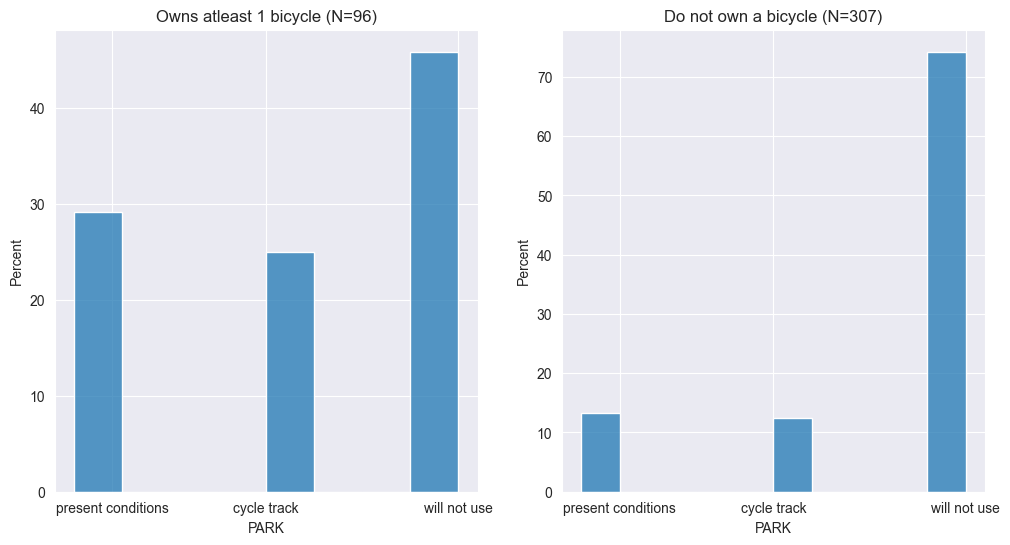

In [282]:
df1=df_park.loc[(df_park['DESTINATION']==1) & (df_park['N_BICYCLES']>0)]
df1.loc[df1['PARK']==4,'PARK']=3
df2=df_park.loc[(df_park['DESTINATION']==1) & (df_park['N_BICYCLES']==0)]
df2=df2.loc[df2['PARK']!=3]
df2.loc[df2['PARK']==4,'PARK']=3

# plotting two countplots of column PARK from both dataframes df1 and df2, side by side
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.set_style('darkgrid')

custom_ticks_1 = [1.2, 2, 3]  # Customize these based on your data
custom_labels_1 = ['present conditions', 'cycle track', 'will not use']  # Customize these labels
ax[0].set_xticks(custom_ticks_1)
ax[0].set_xticklabels(custom_labels_1)
ax[1].set_xticks(custom_ticks_1)
ax[1].set_xticklabels(custom_labels_1)

sns.histplot(data=df1,x='PARK',ax=ax[0],stat='percent')
sns.histplot(data=df2,x='PARK',ax=ax[1],stat='percent')
ax[0].set_title('Owns atleast 1 bicycle (N=96)')
ax[1].set_title('Do not own a bicycle (N=307)')
plt.show()


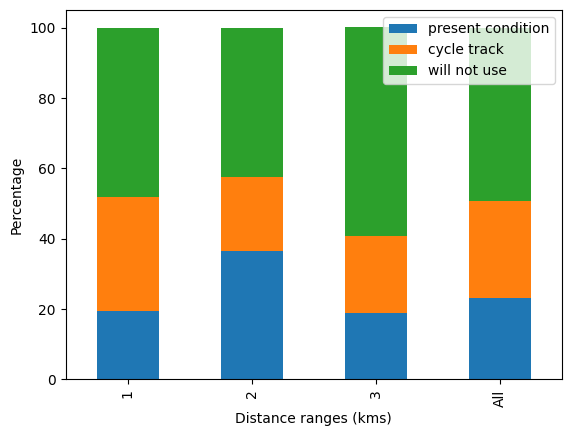

(152, 55)


In [256]:
df1=df_park.loc[(df_park['ORIGIN']==1) & (df_park['N_BICYCLES']>0)]
crosstab=pd.crosstab(df1['ACCESS_DIS_BIN'],df1['PARK'],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Distance ranges (kms)')
plt.ylabel('Percentage')
plt.legend(['present condition','cycle track','will not use'])
plt.show()
print(df1.shape)

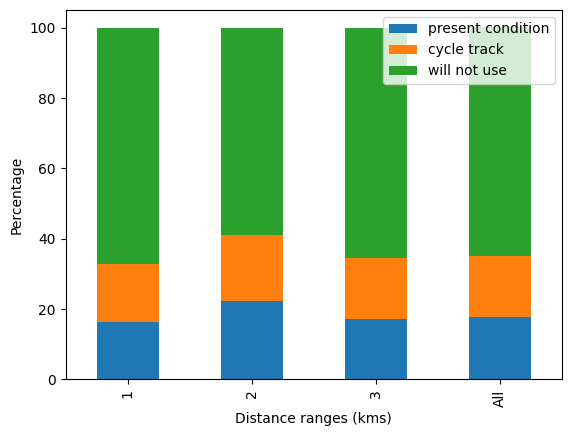

(588, 55)


In [255]:
df1=df_park.loc[(df_park['ORIGIN']==1) & (df_park['N_BICYCLES']==0)]
df1=df1.loc[df1['PARK']!=3]
crosstab=pd.crosstab(df1['ACCESS_DIS_BIN'],df1['PARK'],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Distance ranges (kms)')
plt.ylabel('Percentage')
plt.legend(['present condition','cycle track','will not use'])
plt.show()
print(df1.shape)

        Unnamed: 0   TOTAL_TIME  ACCESS_TIME        WT_FS  EGRESS_TIME  \
count  2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
mean    419.114701    58.554120    10.284733     6.170436     9.634087   
std     286.698514    34.259401     9.523056     4.061252     8.353950   
min       0.000000     5.000000     0.000000     0.000000     0.000000   
25%     181.750000    30.000000     5.000000     4.000000     5.000000   
50%     389.000000    50.000000    10.000000     5.000000     8.000000   
75%     596.000000    75.000000    12.000000     8.000000    10.000000   
max    1114.000000   220.000000   120.000000    60.000000   120.000000   

           WT_FIS  TRANSFER_TIME  WAITING_TIME_SECOND_STOP   TOTAL_COST  \
count  459.000000     914.000000                914.000000  2476.000000   
mean     4.200436       4.726477                  6.541575    34.368740   
std      3.388125       3.969437                  4.643114    62.525212   
min      0.000000       0.000000 

<AxesSubplot: xlabel='TOTAL_TIME', ylabel='count'>

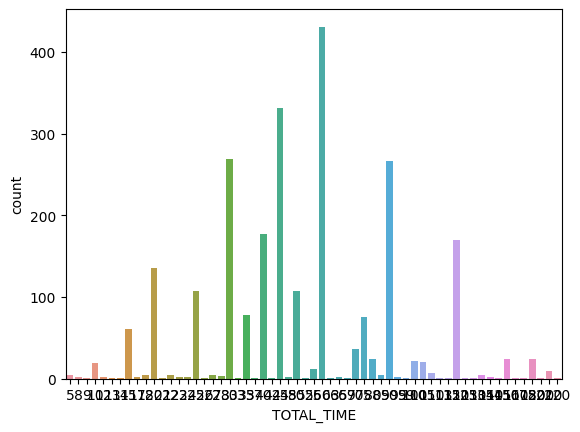

A pie chart for bicycle use at different prices

(660, 53) (1191, 53) (642, 53)


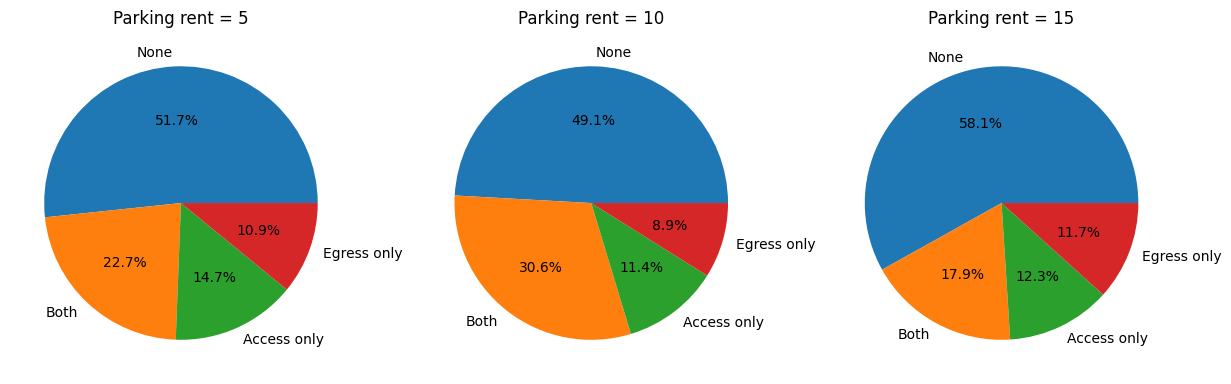

4    341
3    150
1     97
2     72
Name: RENT_BICYCLE, dtype: int64


In [215]:

df1=df[df['PARK_RENT']==5]
df2=df[df['PARK_RENT']==10]
df3=df[df['PARK_RENT']==15]
print(df1.shape,df2.shape,df3.shape)

# lets plot 3 pie charts in a single figure side by side
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pie(df1['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Parking rent = 5')
plt.subplot(132)
plt.pie(df2['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Parking rent = 10')
plt.subplot(133)
plt.pie(df3['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Parking rent = 15')
plt.show()
print(df1['RENT_BICYCLE'].value_counts())

When access time is less than 20 minutes and egress time is greater than 20 

In [59]:

df1=df.loc[(df['ACCESS_TIME']<20) ]
df1=df1.loc[(df1['RENT_BICYCLE']!=4) & (df1['RENT_BICYCLE']!=3)]
# sns.histplot(data=df1,x='RENT_BICYCLE',stat='percent')
fig=px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only","Both"]})
fig.show()

When egress time is less than 20 minutes, commuter use bicycle only for access trip

<AxesSubplot: xlabel='RENT_BICYCLE', ylabel='Percent'>

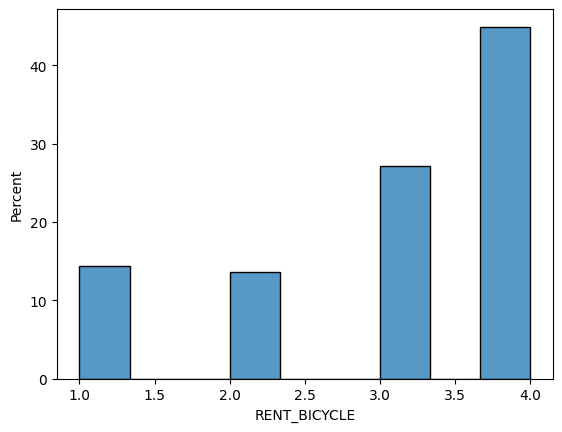

In [60]:
df1=df.loc[(df['ACCESS_TIME']>=20) & (df['EGRESS_TIME']<20) ]
sns.histplot(data=df1,x='RENT_BICYCLE',stat='percent')

ACCESS_TIME_B    1-5   6-10  11-20  21-60
EGRESS_TIME_B                            
1-5            47.40  32.29  16.15   4.17
6-10           33.33  40.78  21.96   3.92
11-20          26.32  32.89  36.84   3.95
21-60          20.69  31.03  31.03  17.24
All            35.35  35.83  24.20   4.62


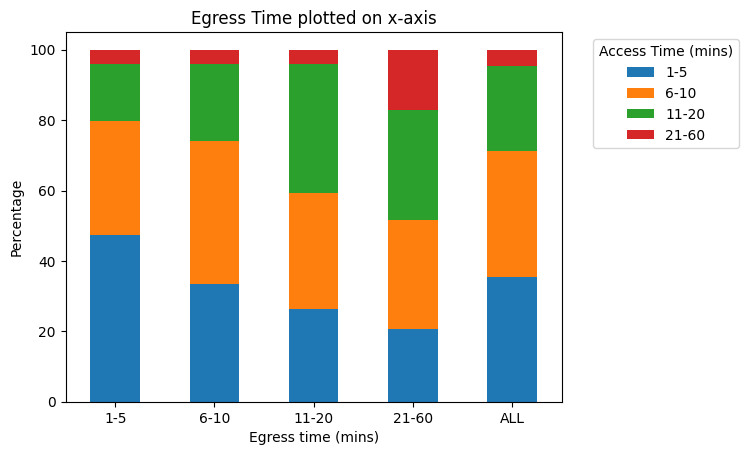

In [61]:
df1=df[df['RENT_BICYCLE']==3]
crosstab=pd.crosstab(df1["EGRESS_TIME_B"],df1["ACCESS_TIME_B"],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
print(crosstab)

# Plotting crosstabulation
bar_width=0.5
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Egress time (mins)')
plt.ylabel('Percentage')
plt.title("Egress Time plotted on x-axis")
plt.xticks([0,1,2,3,4],['1-5','6-10','11-20','21-60','ALL'])
plt.legend(['1-5','6-10','11-20','21-60'])
plt.legend(title='Access Time (mins)',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

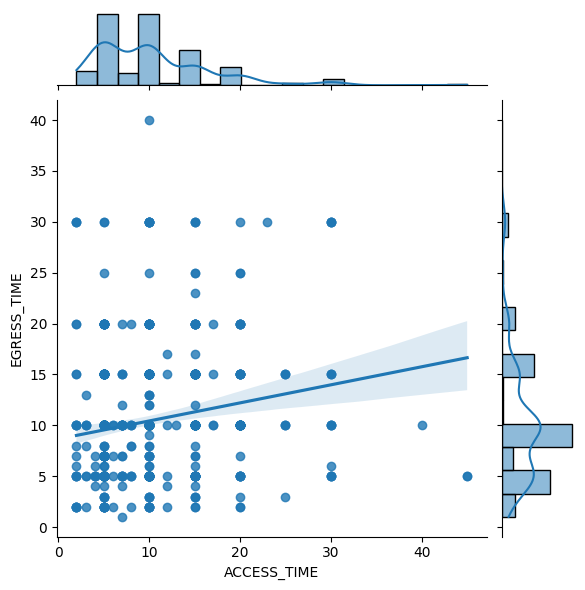

In [62]:
df1=df[df['RENT_BICYCLE']==3]
df1=df1.loc[(df1['ACCESS_TIME']<60) & (df1['EGRESS_TIME']<60)]
sns.jointplot(data=df1,x='ACCESS_TIME',y='EGRESS_TIME',kind='reg')

Less access and egress times?? still willing to use bicycle or both? Is it because of access/egress modes?

In [63]:
df1=df[df['RENT_BICYCLE']==3]
df1=df1.loc[(df1['ACCESS_TIME']<=20) & (df1['EGRESS_TIME']<=20)]
print(df1['ACCESS_M'].value_counts())
print(df1['EGRESS_M'].value_counts())


1     384
3      80
5      54
8      27
6      10
7       8
4       5
2       5
9       1
12      1
Name: ACCESS_M, dtype: int64
1     439
5      62
3      24
8      20
7      13
6       7
4       3
2       2
10      2
9       2
0       1
Name: EGRESS_M, dtype: int64


Modelling

In [64]:
df['USE']=0
mapper={1:1,2:1,3:1,4:0}
df['USE']=df['RENT_BICYCLE'].map(mapper)
df['USE'].value_counts()

0    1299
1    1194
Name: USE, dtype: int64